In [46]:
from d2l_common import add_to_class,Module,ProgressBoard
from torch import nn
import torch
import numpy as np
import torch.nn.functional as F

In [75]:
class LinearRegression(Module):
    def __init__(self, lr):
        super().__init__()
        self.lr = lr
        self.net = nn.Linear(2, 1)
        self.net.weight.data.normal_(0, 0.01)
        self.net.bias.data.fill_(0)
        self.sigma = 1.0

    def forward(self, X):
        y = self.net(X)
        return y

    def loss(self, y_hat, y):
        # # nn.SmoothL1Loss
        residual = (y_hat-y).abs()
        condition = residual < self.sigma
        loss = torch.where(condition, 0.5*self.sigma *
                           residual**2, residual-self.sigma/2)
        return loss.sum()
        # return F.smooth_l1_loss(y_hat, y)

    def configure_optimizers(self):
        return torch.optim.SGD(self.parameters(), self.lr)

In [76]:
# y = torch.matmul(X,w.re)
# def __init__(self, w, b, noise=0.01, num_train=1000, num_val=1000,
#                 batch_size=32):
#     super().__init__()
#     self.save_hyperparameters()
#     n = num_train + num_val
#     self.X = torch.randn(n, len(w))
#     noise = torch.randn(n, 1) * noise
#     self.y = torch.matmul(self.X, w.reshape((-1, 1))) + b + noise

# def get_dataloader(self, train):
#     i = slice(0, self.num_train) if train else slice(self.num_train, None)
#     return self.get_tensorloader((self.X, self.y), train, i)

torch.randn(100, len([2,-3.4])).shape

w=torch.tensor([2,-3.4])
b=4.2
n=100
X = torch.randn(n, len(w))
noise = (torch.randn(n,1)*0.01)
y = (X@w.view(-1,1)+b+noise)

# def get_tensorloader(self, tensors, train, indices=(0, None)):
#     tensors = tuple(a[indices] for a in tensors)
#     dataset = torch.utils.data.TensorDataset(*tensors)
#     return torch.utils.data.DataLoader(dataset, self.batch_size, shuffle=train)
t = tuple(a[slice(0,100)] for a in (X,y))
dataset = torch.utils.data.TensorDataset(*t)
for batch in torch.utils.data.DataLoader(dataset, 32, shuffle=True):
    print(batch[0].shape,batch[1].shape)
    print(*batch[0])


torch.Size([32, 2]) torch.Size([32, 1])
tensor([-0.7884, -1.6931]) tensor([ 0.2413, -1.5486]) tensor([1.5056, 2.2983]) tensor([0.5848, 0.0896]) tensor([ 0.5420, -0.3809]) tensor([-1.4402,  1.2555]) tensor([0.8478, 0.7870]) tensor([-0.9557,  0.6496]) tensor([-0.5521, -0.8080]) tensor([-1.0886, -2.9430]) tensor([-0.4078,  0.7542]) tensor([0.7098, 0.8865]) tensor([-0.7922,  0.3680]) tensor([ 1.2576, -0.5319]) tensor([-0.9778, -0.6540]) tensor([-0.9288, -0.6094]) tensor([-0.1852,  0.8874]) tensor([-1.3071,  1.0064]) tensor([-0.4019, -1.5676]) tensor([ 0.4214, -0.0140]) tensor([-0.0299,  0.2002]) tensor([-1.0708, -2.0007]) tensor([-0.0596, -1.0071]) tensor([-0.6940, -1.3655]) tensor([1.6241, 0.3312]) tensor([ 2.7601, -1.1209]) tensor([-0.5513, -0.9858]) tensor([-1.2150,  1.8694]) tensor([ 1.2924, -0.4426]) tensor([0.7934, 0.9194]) tensor([0.7803, 0.9055]) tensor([-1.0275,  0.3063])
torch.Size([32, 2]) torch.Size([32, 1])
tensor([-0.3348,  0.9558]) tensor([-0.4329,  0.1818]) tensor([-0.1577,

In [79]:
y_hat = torch.randn(10, 1)
y = torch.randn(10, 1)
n = y_hat.shape[0]
torch.sum(1/n*(y_hat-y)*(y_hat-y))
# torch.sum(y_hat-y),torch.abs(y_hat-y)

# y = torch.randn(10, 1)  # 真实值，10个样本，每个样本有1个特征
# y_pred = torch.randn(10, 1)  # 模型预测值，10个样本，每个样本有1个特征

# criterion = nn.MSELoss()  # 创建MSE损失函数
# loss = criterion(y_pred, y)  # 计算MSE损失

# print(loss.item())  # 打印MSE损失值
# torch.tensor([10]).shape
torch.Tensor([1,2,3]).mean()

RuntimeError: mean(): could not infer output dtype. Input dtype must be either a floating point or complex dtype. Got: Long

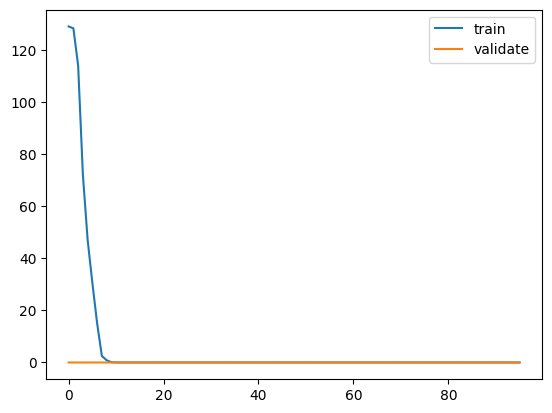

In [78]:
model = LinearRegression(lr=0.03)
from d2l_common import SyntheticRegressionData,Trainer
data = SyntheticRegressionData(w=torch.tensor([2,-3.4]),b=4.2)
trainer = Trainer(max_epochs=3)
trainer.fit(model, data)
model.plot()

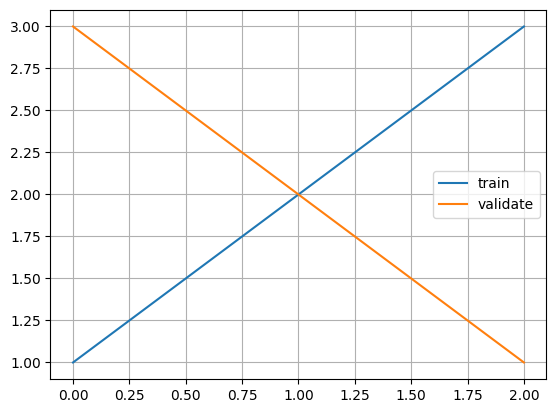

In [9]:
import matplotlib.pyplot as plt
plt.plot(np.array([1,2,3]), label='train')
plt.plot(np.array([3,2,1]), label='validate')
plt.xlabel = 'epoch'
plt.ylabel = 'loss'
plt.legend()
plt.grid()
# plt.show()